## GNF Expression Atlas (BodyMap) expression counts

Show the presence counts per tissue we observed in the [GNF Expression Atlas](https://dx.doi.org/10.1073/pnas.0400782101) data.

In [5]:
import io
import gzip

import pandas
import requests
import numpy
import seaborn
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
# Read BTO id and names
url = 'https://gist.githubusercontent.com/dhimmel/1f252b674c0c75443cc1/raw/a97c3425792f2288b0369de70e1b46018832455b/bto-terms-in-gnf.tsv'
bto_df = pandas.read_table(url)

# Read expression
url = 'http://het.io/disease-genes/downloads/files/expression.txt.gz'
with gzip.open(io.BytesIO(requests.get(url).content)) as read_file:
    gnf_df = pandas.read_table(read_file)
gnf_df = numpy.log10(gnf_df)

In [7]:
# Compute expressed genes per tissue
gnf_summary_df = (gnf_df >= 1.4).sum().reset_index()
gnf_summary_df.columns = ['bto_id', 'count']
gnf_summary_df = bto_df.merge(gnf_summary_df, how='right')
gnf_summary_df = gnf_summary_df.sort('count', ascending=False)

### Figure 1: Distibution of genes present per tissue in GNF Expression Atlas

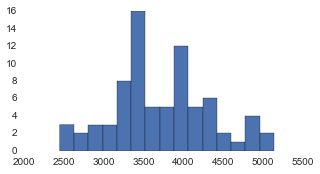

In [8]:
# Plot distribution of expressed genes per tissue
#IPython.core.pylabtools.figsize(5, 2)
seaborn.set_context(rc={'figure.figsize': (5, 2.5)})
plt.hist(gnf_summary_df['count'], 15);

In [9]:
# print dataframe
gnf_summary_df

,bto_id,bto_name,cell_line,count
72,BTO:0003335,EBV-LCL cell,1,5138
19,BTO:0000725,hematopoietic stem cell,0,4996
28,BTO:0000914,natural killer cell,0,4883
75,BTO:0004730,myeloid progenitor cell,0,4823
36,BTO:0001067,pineal gland,0,4799
65,BTO:0002042,dendritic cell,0,4782
43,BTO:0001175,retina,0,4631
70,BTO:0002807,prefrontal cortex,0,4566
58,BTO:0001379,thyroid gland,0,4534
24,BTO:0000776,B-lymphocyte,0,4415
